- A cloth manufacturing company is interested to know about the segment or attributes which causes high sale.
- Use Decision tree classifier and Decision tree regressor to achieve the objective

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


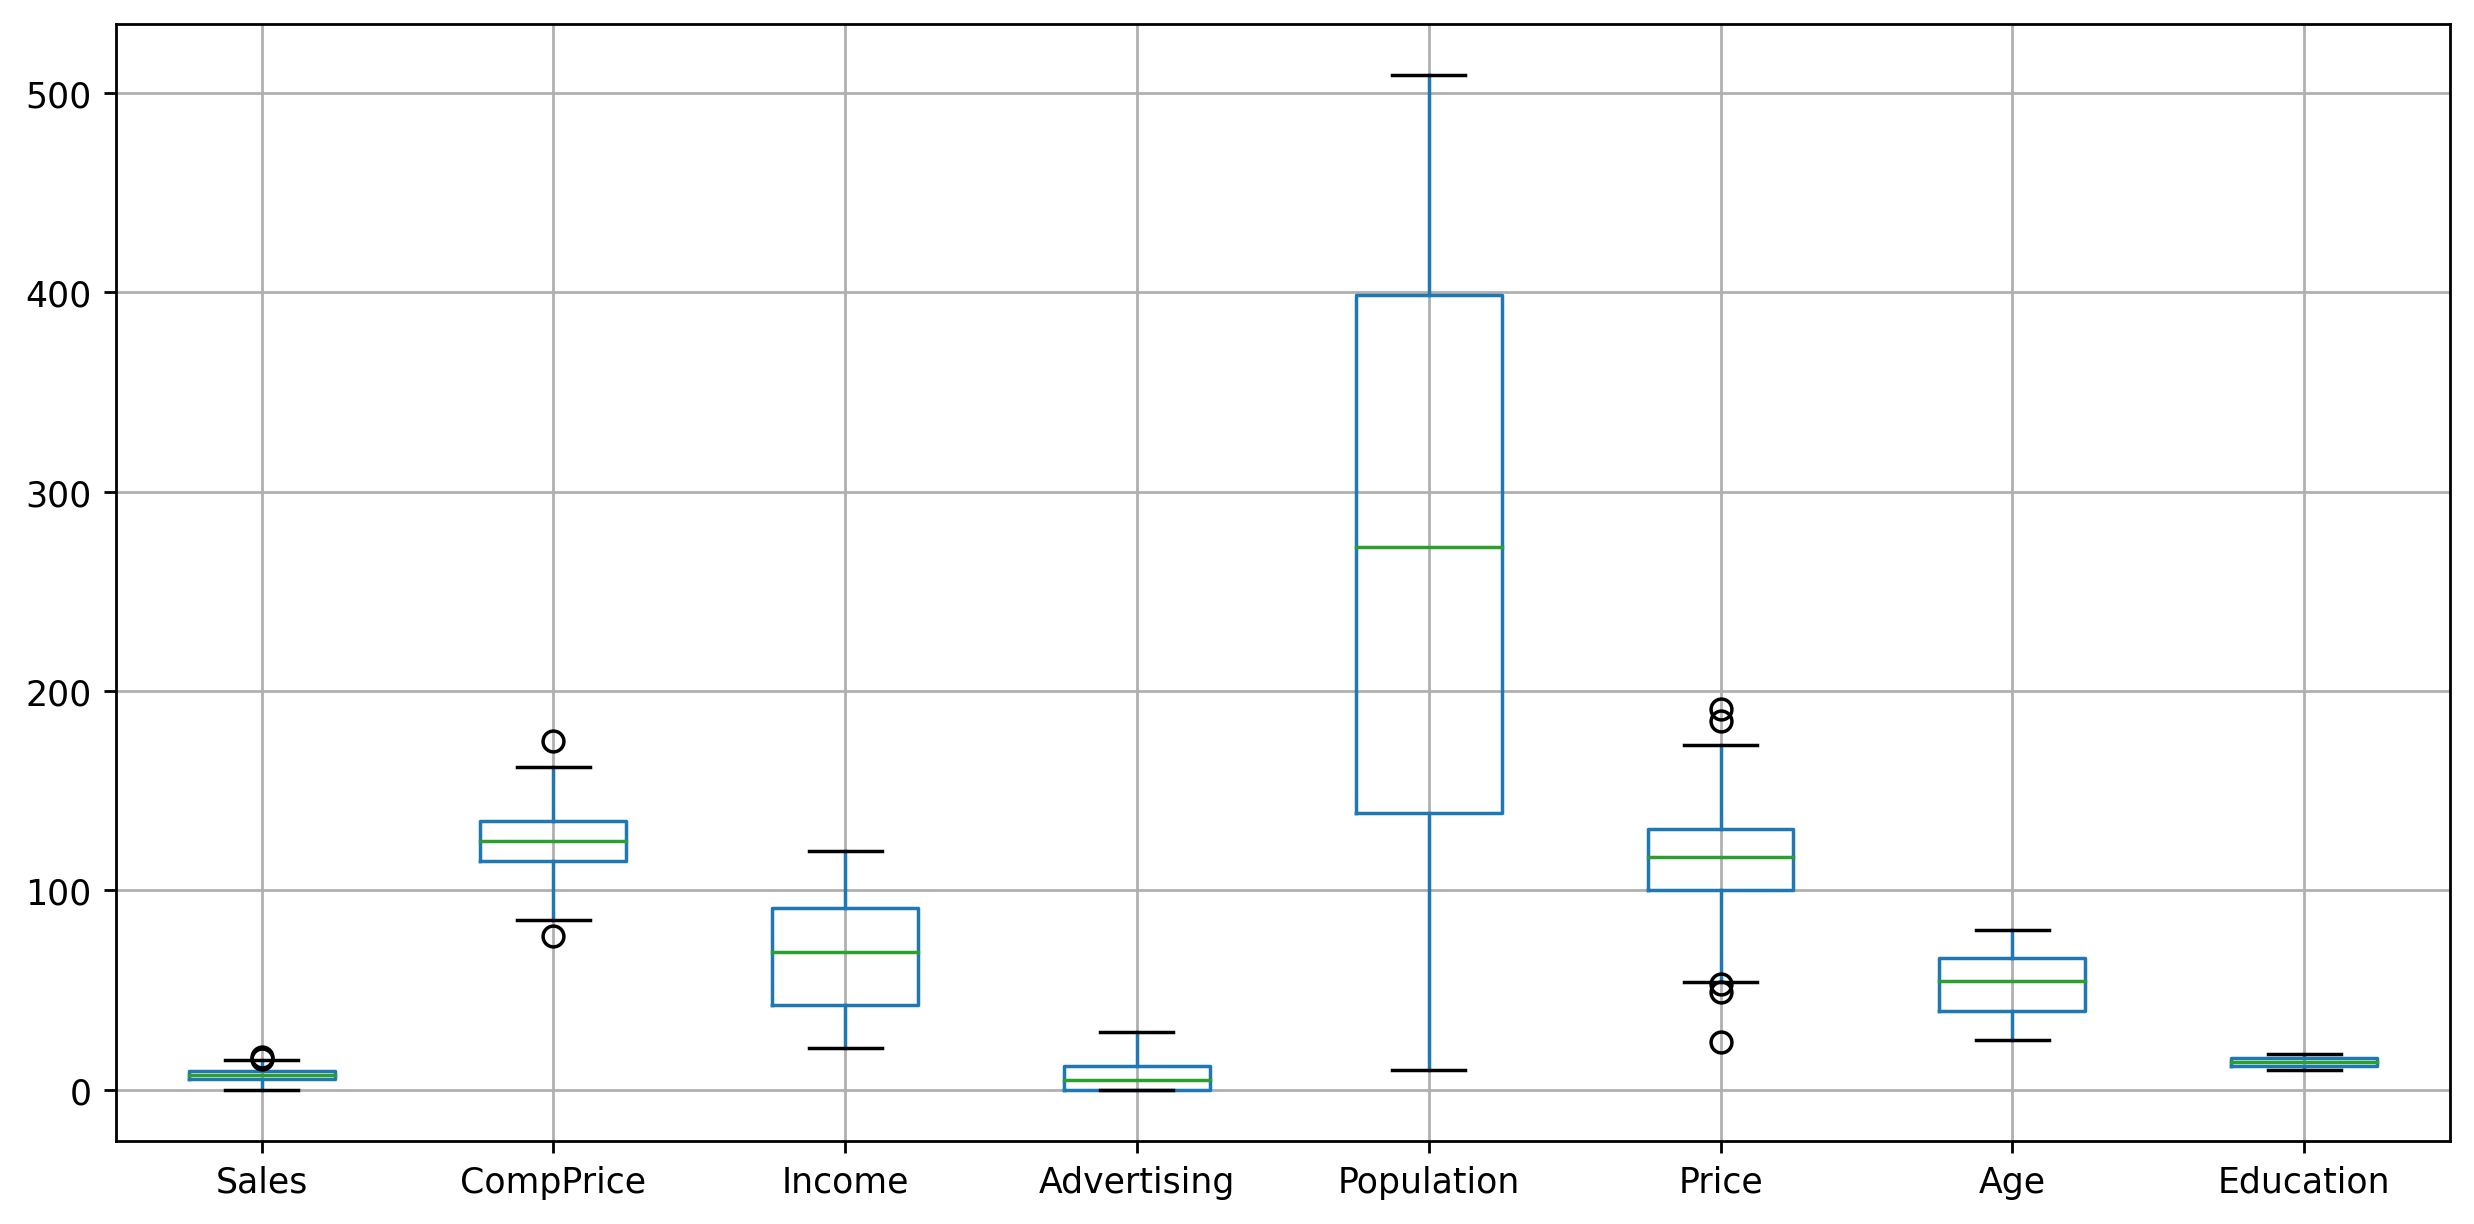

In [14]:
df.boxplot()
plt.tight_layout()

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

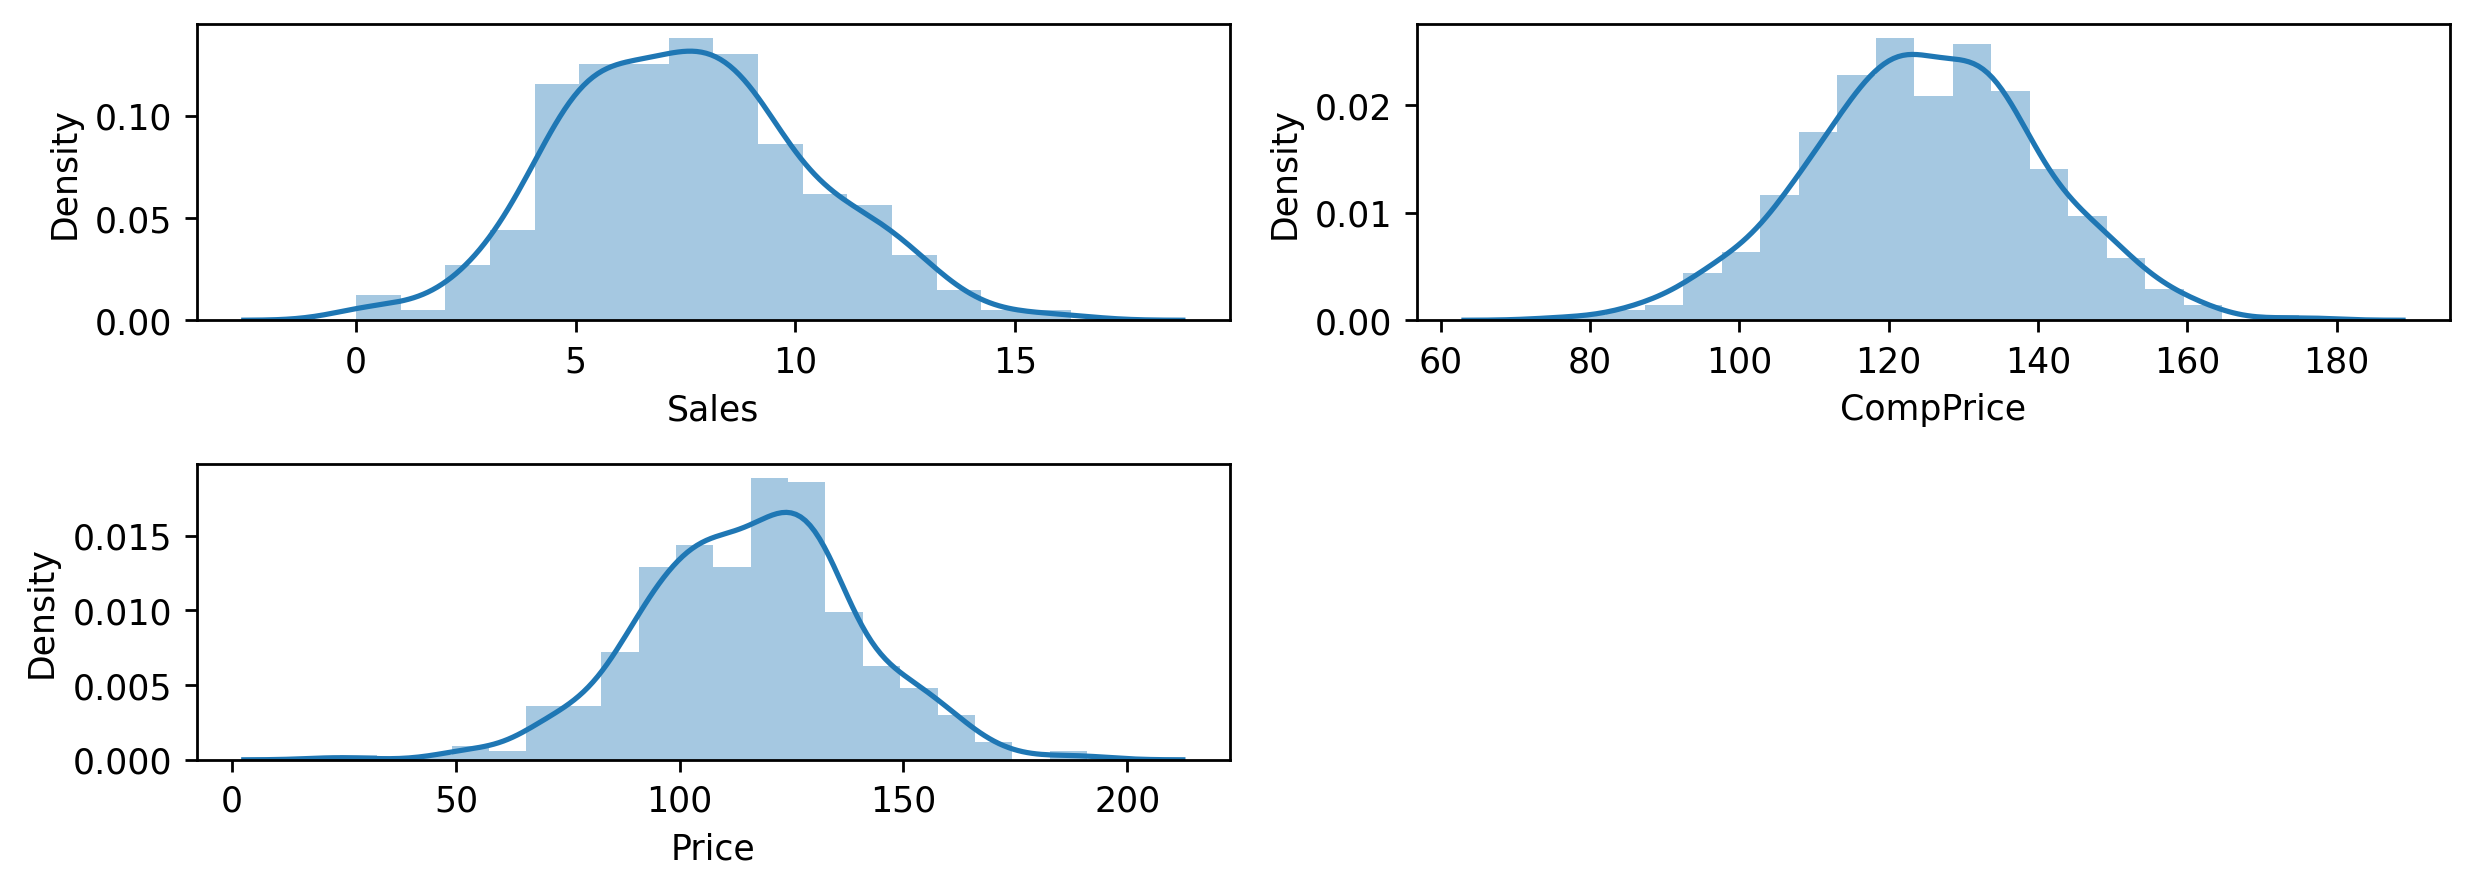

In [32]:
plt.subplot(3,2,1)
ax = sns.distplot(df['Sales'])

plt.subplot(3,2,2)
ax = sns.distplot(df['CompPrice'])

plt.subplot(3,2,3)
ax = sns.distplot(df['Price'])

plt.tight_layout()

In [33]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

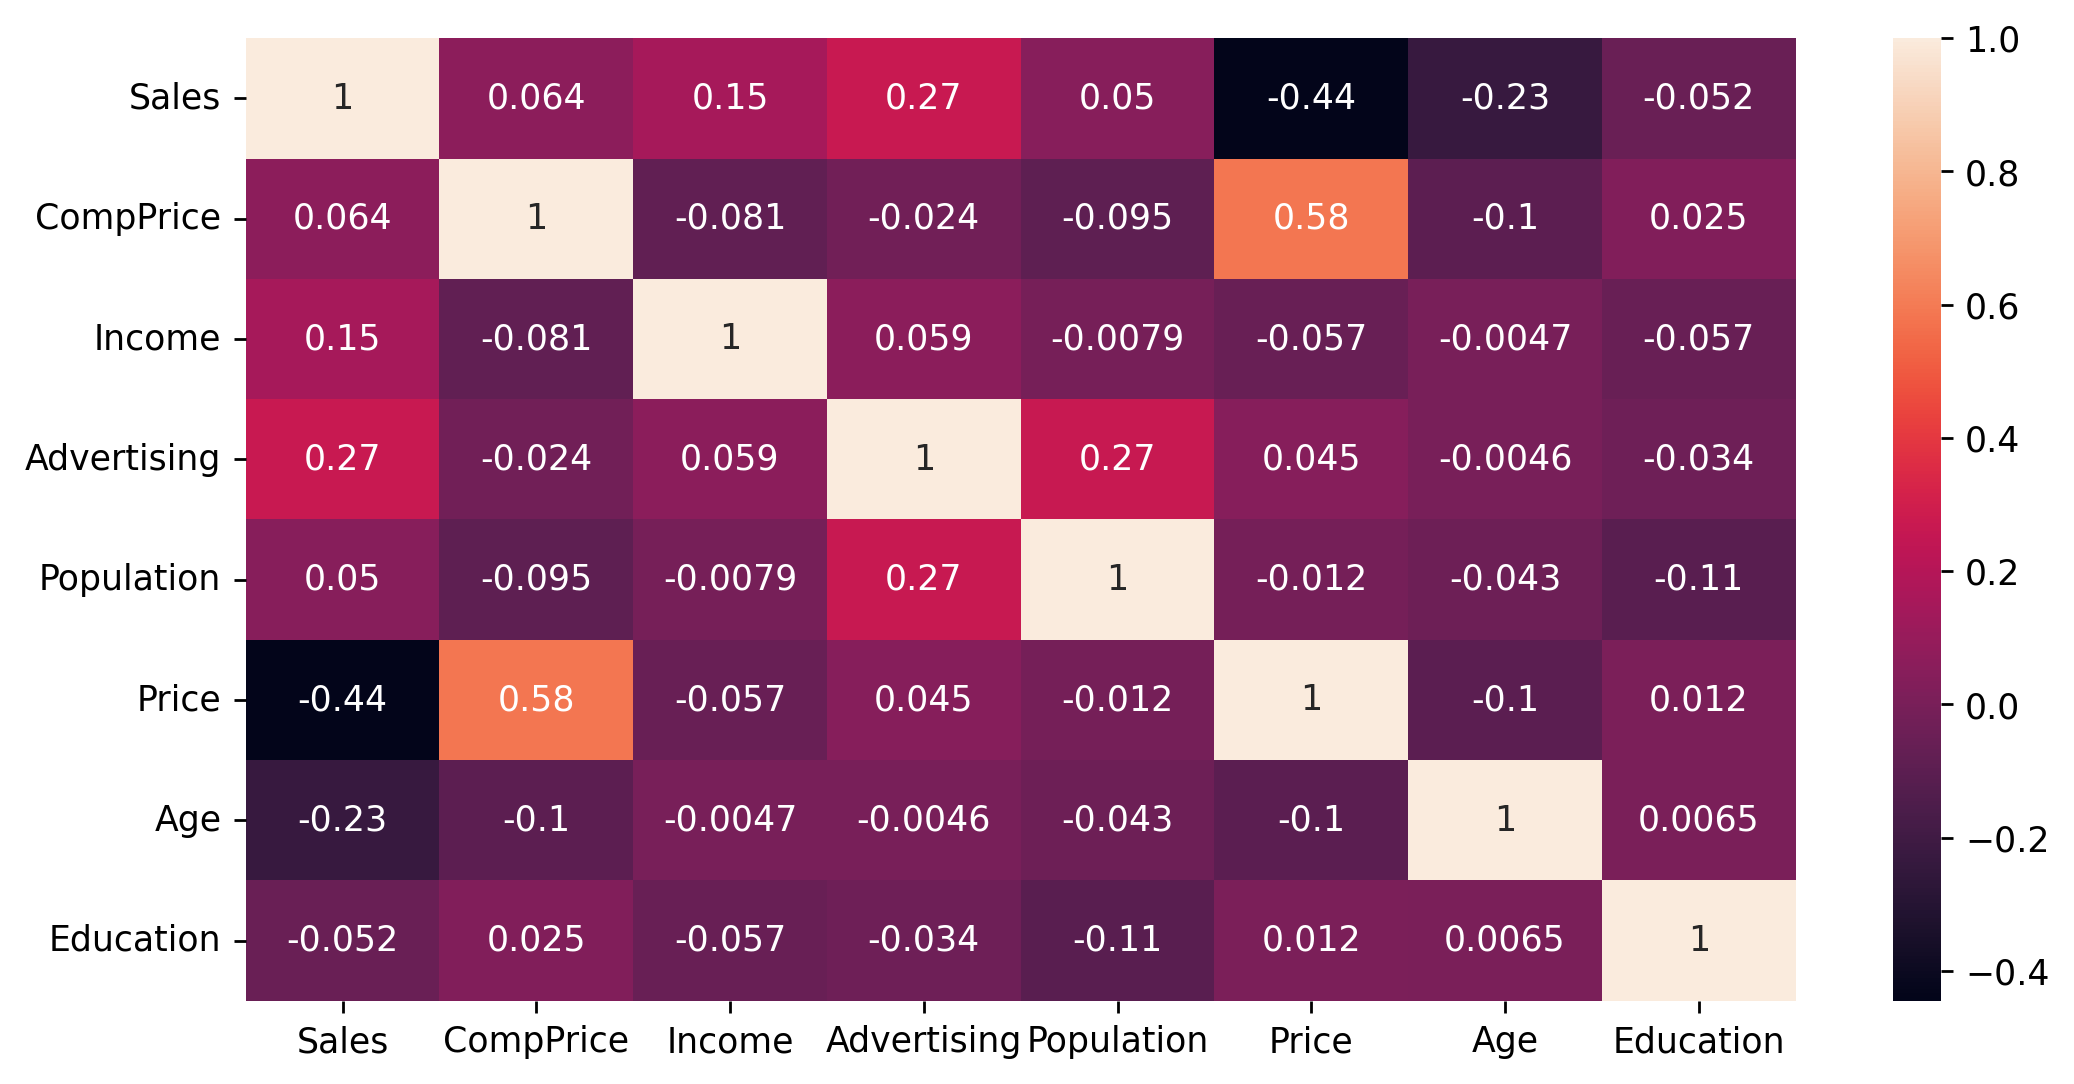

In [34]:
sns.heatmap(data=df.corr(),annot=True)

In [35]:
# Creating Target column 

In [38]:
Target = []
for x1 in df['Sales']:
    if x1 <= 7.49:
        Target.append("Bad")
    else:
        Target.append('Good')
df['Target'] = Target
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,0,42,17,1,Yes,Good
1,11.22,111,48,16,260,83,1,65,10,1,Yes,Good
2,10.06,113,35,10,269,80,2,59,12,1,Yes,Good
3,7.40,117,100,4,466,97,2,55,14,1,Yes,Bad
4,4.15,141,64,3,340,128,0,38,13,1,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,Yes,Good
396,6.14,139,23,3,37,120,2,55,11,0,Yes,Bad
397,7.41,162,26,12,368,159,2,40,18,1,Yes,Bad
398,5.94,100,79,7,284,95,0,50,12,1,Yes,Bad


In [41]:
le = LabelEncoder()
df['Urban'] = le.fit_transform(df['Urban'])
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Target'] = le.fit_transform(df['Target'])
df['US'] = le.fit_transform(df['US'])

In [42]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


# Model Building
- splitting Data into Training and Testing 

In [43]:
x =df.drop(axis = 1, columns={'Sales','Target'})
y = df['Target']

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

# Decision Tree
- C 5.0

In [45]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=2)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.26      0.39        58
           1       0.57      0.94      0.71        62

    accuracy                           0.61       120
   macro avg       0.68      0.60      0.55       120
weighted avg       0.68      0.61      0.56       120



In [48]:
print(dt.score(xtrain,ytrain))
dt.score(xtest, ytest)

0.6464285714285715


0.6083333333333333

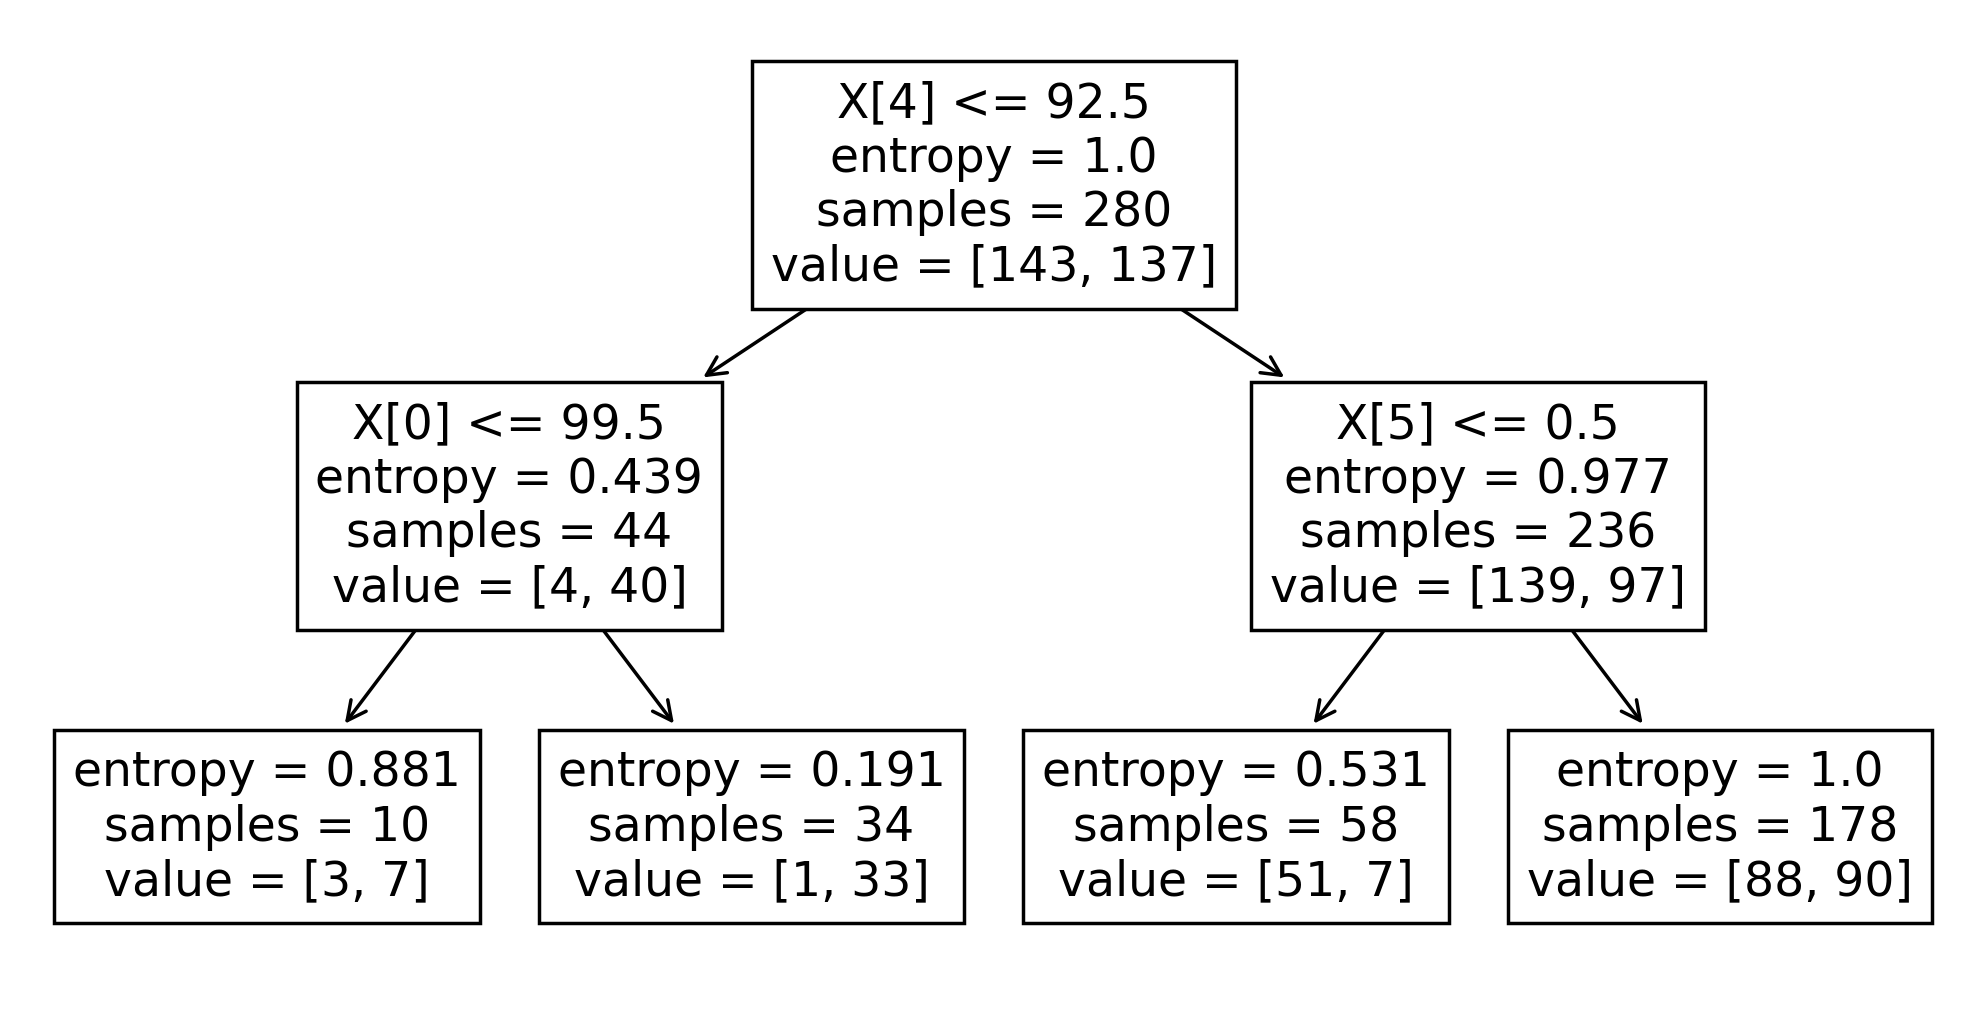

In [51]:
tree.plot_tree(dt);

# Decision Tree
- CART Algorithm

In [52]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=2)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.26      0.39        58
           1       0.57      0.94      0.71        62

    accuracy                           0.61       120
   macro avg       0.68      0.60      0.55       120
weighted avg       0.68      0.61      0.56       120



In [54]:
print(dt.score(xtrain,ytrain))
dt.score(xtest, ytest)

0.65


0.6083333333333333

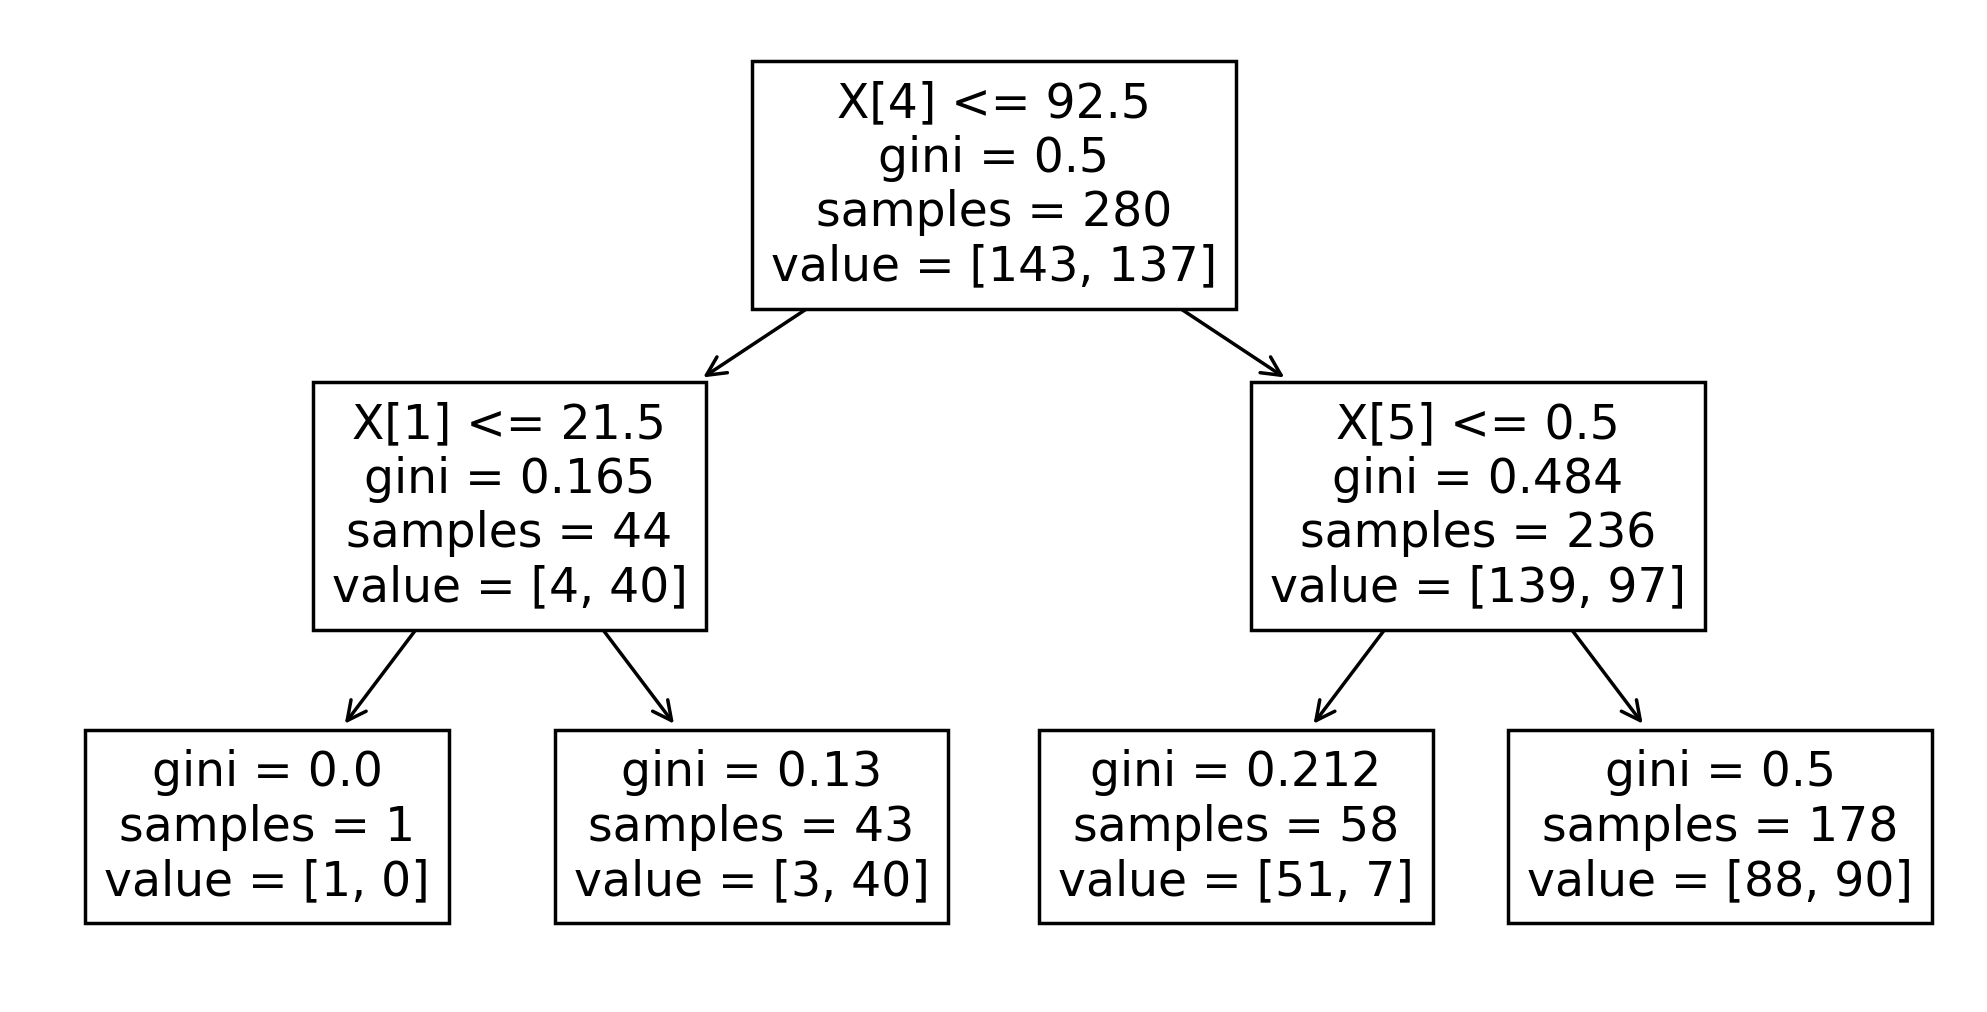

In [64]:
tree.plot_tree(dt);

In [65]:
# Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
    }

In [58]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params)

In [59]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [60]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'random'}

In [61]:
dt1 = DecisionTreeClassifier(criterion="entropy",max_depth=8,splitter='random')
dt1.fit(xtrain,ytrain)
ypred = dt1.predict(xtest)

In [62]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        58
           1       0.75      0.74      0.75        62

    accuracy                           0.74       120
   macro avg       0.74      0.74      0.74       120
weighted avg       0.74      0.74      0.74       120



In [63]:
print(dt1.score(xtrain,ytrain))
dt1.score(xtest, ytest)

0.9321428571428572


0.7416666666666667

# Decision Tree for Regression Model

In [66]:
x1 =df.drop(columns={'Sales','Target'})
y1 = df['Sales'].astype(int)

In [67]:
xtrain,xtest,ytrain,ytest =train_test_split(x1,y1,test_size= 0.2, random_state=1)

In [68]:
from sklearn.metrics import r2_score

In [69]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
ypred = dtr.predict(xtest)

r2_score(ytest,ypred)

0.1754631314776145

In [70]:
print(dtr.score(xtrain,ytrain))
dtr.score(xtest,ytest)

1.0


0.1754631314776145

In [ ]:
# the Decision tree classfier gives a good result and Decision tree regresser is not an advisable method to classify the salary data, since this is not a regression problem.